# MINI PROJECT-2- SENTIMENT ANALYSIS

**INTRODUCTION:**

**Business owners always want to know how their customres react to their quality of the services provided in order to optimise their business. The users  may post their reviews and ratings of the venues based on their experience and express their insight on others reviews. Finding the user experience based on the serive provided is very important for the business owners. The main goal of the project is to train a model that can automatically predict the customer sentiment i.e. positive and negative reviews in the hospitality of the venues in order to derive the perception of the users for the specific venues.**

# Dataset Overview:
**Number of entries: 6,500
No missing values in the dataset
Features: id, business_id, date, review_id, text, type, user_id, cool, useful, funny, class
Target variable: class (0 for negative, 1 for positive sentiment)**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# datasets and model prep
from sklearn import datasets # to import sklearn datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest # use a simple option for now
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
# models
from sklearn.linear_model import LinearRegression, LogisticRegression # model
from sklearn.svm import SVC

# model evaluation
from sklearn.inspection import DecisionBoundaryDisplay # to plot the decision boundary
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, roc_curve, get_scorer_names,\
                            classification_report, confusion_matrix ,ConfusionMatrixDisplay, auc # review model metrics

from sklearn.metrics import precision_score, accuracy_score
seed = 1234


In [28]:
import re as rgx
import string

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Natural Language Tool Kit (NLTK) is a package with helpful functions for processing text
# it tends to be used by academics but is easy to implement. Other options are Gensim and SpaCy
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
df = pd.read_csv('train.csv')
df.head()

,id,business_id,date,review_id,text,type,user_id,cool,useful,funny,class
0,2847,PmPOuRvuN3CoNOi1nBj_TQ,2011-09-29,oWLh_cqC97TUvRq_JjRUzw,"In town for business, and came to Pappadeaux's...",review,sgb91Hc4rVeLqehNy7Pvnw,0,1,0,1
1,3602,m9Wqqma30o-hH2fAX7dnug,2012-01-28,6f9pb2-bUdxlsQqJs8-cSQ,I'm on the constant hunt for good Chinese food...,review,PNS9z4aFDbfhpIsHCfNvNg,0,2,0,1
2,6531,TDX5Peai64ZdDvU5xHV5cQ,2011-06-06,n-suBhJOCH3mL53DvyrLPA,Jake's been taking care of our cars for almost...,review,NPoOEAPspruMOik-9sKQtQ,0,0,0,1
3,1301,EmlgWjs1ZzZEpDjZCSPLmw,2012-11-02,YDGhV4Lakr4TDElnwvfy2w,I am in love with the cinema suite! Being able...,review,P7Zcg73x8FzszGEiC9YPfw,0,0,0,1
4,3906,xczdDnDIUoVZ2ILT9nEvPA,2011-12-20,N2sauZfbLwxnbUviLo43Jw,3 kids and myself.. 14 bucks.. gotta love a Tu...,review,C6IOtaaYdLIT5fWd7ZYIuA,3,3,2,1


In [30]:
df.shape

(6500, 11)

In [31]:
df.info()# no NULL values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6500 non-null   int64 
 1   business_id  6500 non-null   object
 2   date         6500 non-null   object
 3   review_id    6500 non-null   object
 4   text         6500 non-null   object
 5   type         6500 non-null   object
 6   user_id      6500 non-null   object
 7   cool         6500 non-null   int64 
 8   useful       6500 non-null   int64 
 9   funny        6500 non-null   int64 
 10  class        6500 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 558.7+ KB


In [32]:
df.dtypes

id              int64
business_id    object
date           object
review_id      object
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
class           int64
dtype: object

In [33]:
df.describe()

,id,cool,useful,funny,class
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,5015.677692,0.886923,1.412615,0.706923,0.686308
std,2884.482403,2.151512,2.409634,1.892018,0.464029
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2519.750000,0.000000,0.000000,0.000000,0.000000
50%,5013.500000,0.000000,1.000000,0.000000,1.000000
75%,7529.250000,1.000000,2.000000,1.000000,1.000000
max,9998.000000,77.000000,76.000000,39.000000,1.000000


In [34]:
# split the data. Use the same seed

X = df['text'] # feature
y = df['class'] # target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=seed)

# Modelling

**The model used Multinomial Naive Bayes classifier the main reason to select the model for its efficiency with text classificaton, performs well with sparse data also maintains good balance accuracy and efficiency and focuses on positive predictive power which is crucial for testinomials.**

In [35]:
vectorizer = CountVectorizer()#CountVectorizer used for feature extraction and vectorization of text data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_vec,y_train)
y_pred = mnb.predict(X_test_vec)
print("Accuracy of a multinomial naive bayes classifier: {:2.2%}".format(mnb.score(X_test_vec, y_test)))
print("Precision of a Multinomial Naive Bayes classifier: {:.2%}".format(precision_score(y_test, y_pred)))

Accuracy of a multinomial naive bayes classifier: 80.69%
Precision of a Multinomial Naive Bayes classifier: 82.60%


# Hyperparameter Tuning:

In [22]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0],  #  It controls the amount of smoothing applied to the feature probabilities. Smoothing is necessary to handle unseen features in the test data. 
    'fit_prior': [True, False],  # try different options for fit_prior
    'class_prior': [None, [0.3, 0.7], [0.7, 0.3]]  # try different class_prior values
}

# Create the grid search object
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_vec, y_train)

# Print the best score and best parameters
print("Best Score: {:.2%}".format(grid_search.best_score_))
print("Best Parameters: ", grid_search.best_params_)

Best Score: 82.13%
Best Parameters:  {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}


**By systematically testing different parameter values, we aimed to optimize the model's performance in terms of accuracy, precision, or other evaluation metrics. This approach allowed us to fine-tune the model and select the parameter combination that yielded the highest precision score on our dataset.**

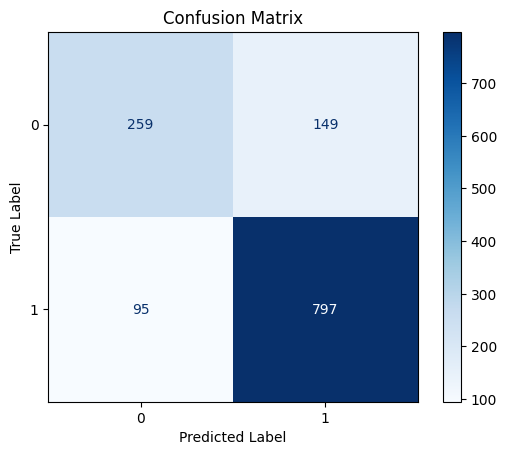

In [15]:
# Get the predictions on the test set using the best estimator from grid search
y_pred = grid_search.best_estimator_.predict(X_test_vec)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
cm_display = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
cm_display.plot(cmap='Blues')

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Random Oversampling applied to balance the class distribution
**BaggingClassifier with MNB as the base estimator used for improved performance
Precision score improved to 82.26%**

In [38]:
from imblearn.over_sampling import RandomOverSampler

# Apply random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_vec, y_train)

# Train the model using the resampled data
mnb.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [39]:
# Get predicted probabilities
y_pred_proba = mnb.predict_proba(X_test_vec)

# Adjust the threshold (e.g., set it to 0.6)
threshold = 0.6
y_pred_1 = (y_pred_proba[:, 1] > threshold).astype(int)

In [42]:
from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with MultinomialNB as the base estimator
bagging_mnb = BaggingClassifier(base_estimator=mnb)

# Fit the bagging classifier to the training data
bagging_mnb.fit(X_train_vec, y_train)

# Predict on the test data
y_pred_2 = bagging_mnb.predict(X_test_vec)

# Calculate the precision score
precision = precision_score(y_test, y_pred_2)

# Print the precision score
print("Precision Score: {:.2%}".format(precision))

Precision Score: 82.26%


C:\Users\Manish\anaconda3\envs\class2\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# cross-validation results from GridSearchCV

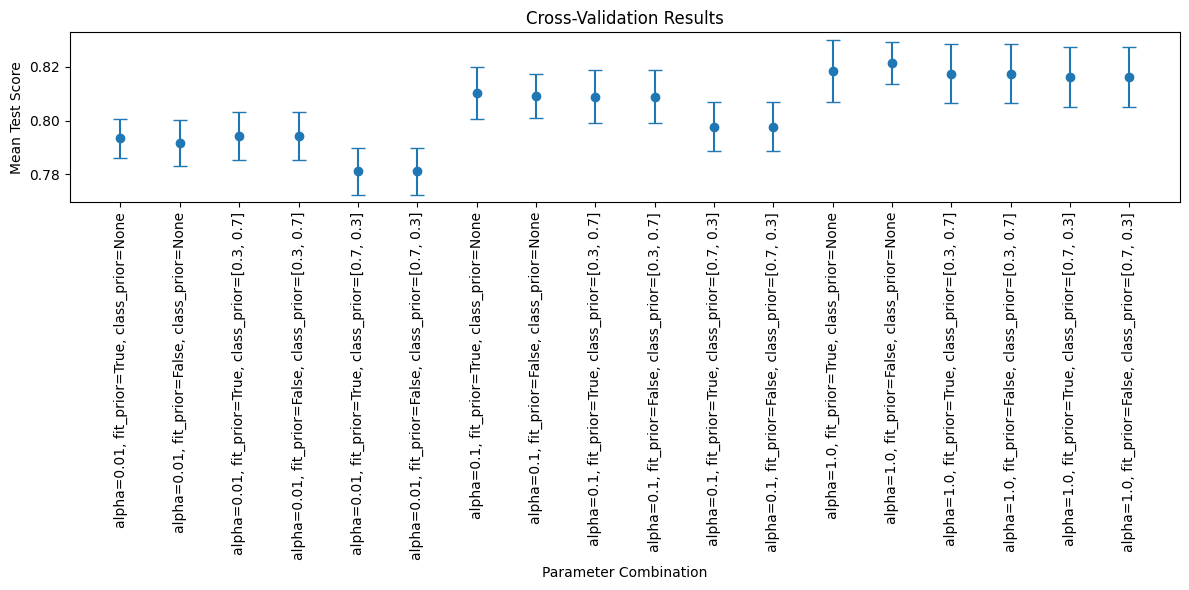

In [43]:
# Access the cross-validation results from GridSearchCV
results = grid_search.cv_results_

# Get the mean and standard deviation scores for each parameter combination
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
params = results['params']

# Extract the parameter values for plotting
alpha_values = [param['alpha'] for param in params]
fit_prior_values = [param['fit_prior'] for param in params]
class_prior_values = [param['class_prior'] for param in params]

# Create a unique label for each parameter combination
labels = [f"alpha={alpha}, fit_prior={fit_prior}, class_prior={class_prior}" 
          for alpha, fit_prior, class_prior in zip(alpha_values, fit_prior_values, class_prior_values)]

# Plot the cross-validation results
plt.figure(figsize=(12, 6))
plt.errorbar(np.arange(len(labels)), mean_scores, yerr=std_scores, fmt='o', capsize=5)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.title('Cross-Validation Results')
plt.tight_layout()
plt.show()

**The cross-validation plot helps in understanding how different parameter combinations affect the performance of the model. It allows us to identify the parameter combination that results in the highest mean test score, indicating the best performance. In this project, the best parameter combination can be identified based on the highest point on the plot.**

# Model Evaluation:
**Confusion matrix analysis to assess model performance plot visualized to show true positive, true negative, false positive, and false negative rates.Overall, the model demonstrates good performance in identifying positive sentiments.**

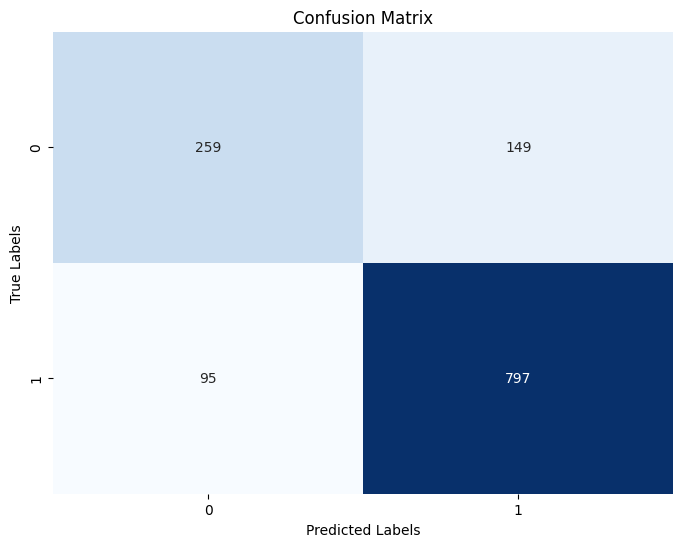

In [44]:
# Predict on the test data using the final model
y_pred_3 = grid_search.predict(X_test_vec)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_3)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [7]:
test_data = pd.read_csv('test.csv')

In [8]:
X_test = test_data['text']
X_test_vectorized = vectorizer.transform(X_test)
predicted = mnb.predict(X_test_vectorized)
output_df = pd.DataFrame({'id': test_data['id'], 'class': predicted})
# Save the DataFrame to a CSV file
#output_df.to_csv('predictions_test.csv', index=False)

# Conclusion:
**The automated sentiment analysis model can provide valuable insights to clients in the hospitality industry
Positive reviews can be automatically identified and used as testimonials on client websites
The model achieves a positive predictive power of 82.26%, ensuring reliable identification of positive sentiments.**